In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from pre_processing import *

class Loader():
    def __init__(self, **kwargs):
        super().__init__()
        # from https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#loading-and-normalizing-cifar10
        print('Wait for both datasets to be downloaded and verified.')
        transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
        trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform) 
        trainloader = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=True, num_workers=2)
        testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
        testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=False, num_workers=2)
        self.classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
        self.trainloader = trainloader
        self.testloader = testloader

Wait for both datasets to be downloaded and verified.
Files already downloaded and verified
Files already downloaded and verified


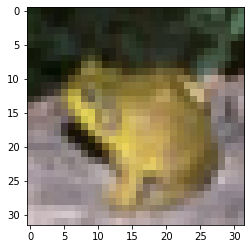

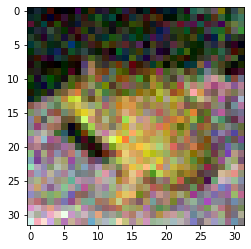

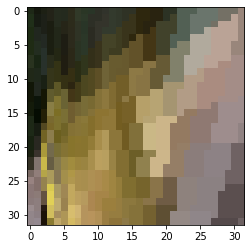

In [4]:
dataset = Loader()
trainloader = dataset.trainloader
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
# show images
img = torchvision.utils.make_grid(images)
img = img / 2 + 0.5 # unnormalize
npimg = img.numpy()
plt.figure()
plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.figure()
noise_image = add_gaussian_noise(npimg)
plt.imshow(np.transpose(noise_image, (1, 2, 0)))
plt.figure()
trans_image = random_projective_transform(npimg)
plt.imshow(np.transpose(trans_image, (1, 2, 0)))